In [1]:
# !pip install yfinance danbi midas-quant

In [2]:
import sys, danbi as bi
sys.path.append("..")

In [3]:
import yfinance as yf
import pandas as pd

In [4]:
import pandas_ta as ta
import midas_quant as miq

In [5]:
import danbi as bi
from danbi.extends import bibokeh as bibo
bibo.setJupyterEnable()

Loading BokehJS ...

# Data Loading

In [6]:
# Set the ticker symbol for Samsung Electronics
ticker = '005930.KS'

In [7]:
# Download the stock data (daily data for the past year)
df = yf.download(ticker, start='2020-01-01', end='2024-10-09')

[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,49099.429688,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,49366.269531,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,49366.269531,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,49633.117188,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,50522.593750,23501171


In [9]:
# Reset the index to convert the Date from index to a column
df.reset_index(inplace=True)

In [10]:
# Convert all column names to lowercase
df.columns = [col.lower() for col in df.columns]

In [55]:
df.rename(columns={'date': 'reg_day'}, inplace=True)

In [56]:
df

,reg_day,open,high,low,close,adj close,volume,ma5,ma10,ma20,ma60
59,2020-03-27,49600.0,49700.0,46850.0,48300.0,42961.992188,39896178,46840.0,46435.0,50585.0,56161.666667
60,2020-03-30,47050.0,48350.0,46550.0,47850.0,42875.968750,26797395,47910.0,46330.0,50227.5,56039.166667
61,2020-03-31,48000.0,48500.0,47150.0,47750.0,42786.375000,30654261,48070.0,46375.0,49845.0,55910.000000
62,2020-04-01,47450.0,47900.0,45800.0,45800.0,41039.070312,27259532,47500.0,46395.0,49265.0,55748.333333
63,2020-04-02,46200.0,46850.0,45350.0,46800.0,41935.121094,21621076,47300.0,46780.0,48715.0,55598.333333
...,...,...,...,...,...,...,...,...,...,...,...
1167,2024-09-30,64200.0,64300.0,61500.0,61500.0,61500.000000,32694163,63160.0,63520.0,66845.0,76205.000000
1168,2024-10-02,60500.0,61900.0,59900.0,61300.0,61300.000000,28473536,62780.0,63020.0,66210.0,75863.333333
1169,2024-10-04,61000.0,61700.0,60500.0,60600.0,60600.000000,24247578,62460.0,62640.0,65525.0,75463.333333
1170,2024-10-07,60200.0,61900.0,59500.0,61000.0,61000.000000,35066533,61720.0,62430.0,64855.0,75028.333333


# Generate Indicator

In [57]:
df["ma5"] = ta.sma(df.close, 5)
df["ma10"] = ta.sma(df.close, 10)
df["ma20"] = ta.sma(df.close, 20)
df["ma60"] = ta.sma(df.close, 60)

In [58]:
df.dropna(inplace=True)

In [64]:
bibo.showAsRows([
    bibo.plotTimeseries(df, "reg_day", ["close", "ma5", "ma10", "ma20", "ma60"], 300),
], "x", 1200)

# Understanding Midas-Quant Basic Environments

## create data feeder

In [65]:
dfs = [df]
infos = [{"code": ticker, "name": "Samsung Electronics"}]

## create environments

In [70]:
feeder = miq.PandasFeeder(dfs, 5, backword=True, col_daytime="reg_day", col_price="close", infos=infos)

In [71]:
env = miq.StockSpotEnv(feeder, balance=1_000_000, quantity=10, fee=0.015, tax=0.38)

In [72]:
type(env)

midas_quant.environments.StockSpotEnv.StockSpotEnv

In [73]:
obs, info = env.reset()

In [74]:
obs

,reg_day,open,high,low,close,adj close,volume,ma5,ma10,ma20,ma60,average_price
0,2020-06-24,51900.0,53900.0,51600.0,52900.0,47401.023438,24519552,52300.0,52230.0,52820.0,50216.666667,0
1,2020-06-25,52100.0,53000.0,51900.0,51900.0,46504.976562,18541624,52220.0,51990.0,52895.0,50276.666667,0
2,2020-06-26,52800.0,53900.0,52200.0,53300.0,47759.437500,21575360,52300.0,52090.0,53025.0,50367.500000,0
3,2020-06-29,52500.0,53200.0,52000.0,52400.0,47266.925781,17776925,52380.0,52340.0,53085.0,50445.000000,0
4,2020-06-30,53900.0,53900.0,52800.0,52800.0,47627.750000,21157172,52660.0,52410.0,53155.0,50561.666667,0


In [75]:
print(obs.columns)

['reg_day', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'ma5', 'ma10', 'ma20', 'ma60']


In [76]:
obs.isBackword()

True

In [77]:
obs.downValue(0, "close", 50000)

False

In [78]:
obs.upCompare(0, "close", "ma5")

True

In [79]:
info.feed_change

False

In [80]:
info.asset

reg_day          2020-06-30 00:00:00
balance                      1000000
quantity                           0
average_price                      0
invested                           0
account                    1000000.0
Name: 0, dtype: object

In [81]:
info.trade

# Create Strategy

In [82]:
tsm = miq.TSMStockSpotEnv([
    {'trigger': 'none_buy', 'source': 'NONE', 'dest': 'OWN'},
    {'trigger': 'cut', 'source': 'OWN', 'dest': 'OWN'},
    {'trigger': 'plus', 'source': 'OWN', 'dest': 'OWN'},
    {'trigger': 'sell', 'source': 'OWN', 'dest': 'NONE'},
], "NONE", env)

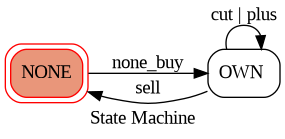

In [83]:
tsm.graph()

In [84]:
tsm.state

'NONE'

In [85]:
tsm.cut()

False

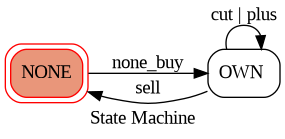

In [86]:
tsm.graph()

In [87]:
tsm.none_buy()

True

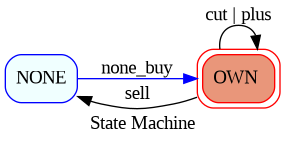

In [88]:
tsm.graph()

In [89]:
tsm.state

'OWN'

In [90]:
tsm.sell()

True

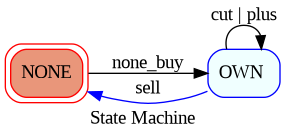

In [91]:
tsm.graph()

In [92]:
tsm.state

'NONE'

# Trading Cross Over Strategy

In [93]:
_ = tsm.reset()

In [94]:
@bi.asClassMethod(tsm)
def StrategyNONE(self: miq.TSMStockSpotEnv, obs: miq.PandasPart, info: bi.DotDict, verbose: bool):
    action = None
    if obs.cross(0, "ma10", "ma20", "up"):
        action = "none_buy"
    
    return action

In [95]:
tsm.devTest("NONE")

In [96]:
asset, trade = tsm.getEnvironments().getHistory()

In [97]:
asset

,reg_day,balance,quantity,average_price,invested,account
0,2020-06-30,1000000,0,0,0,1000000.0
1,2020-06-30,1000000,0,0,0,1000000.0


In [98]:
trade

,reg_day,action,price,quantity,fee,tax,net_price,rate


In [99]:
@bi.asClassMethod(tsm)
def StrategyOWN(self: miq.TSMStockSpotEnv, obs: miq.PandasPart, info: bi.DotDict, verbose: bool):
    action = None
    if obs.cross(0, "ma10", "ma20", "down"):
        action = "sell"
    
    return action

In [100]:
tsm.devTest("OWN")

In [101]:
asset, trade = tsm.getEnvironments().getHistory()

In [102]:
asset

,reg_day,balance,quantity,average_price,invested,account
0,2020-06-30,1000000,0,0,0,1000000.0
1,2020-06-30,1000000,0,0,0,1000000.0


In [103]:
trade

,reg_day,action,price,quantity,fee,tax,net_price,rate


# Simulation

In [104]:
tsm.simulation()

In [105]:
asset, trade = tsm.getEnvironments().getHistory()

In [106]:
asset

,reg_day,balance,quantity,average_price,invested,account
0,2020-06-30,1000000,0,0,0,1000000.0
1,2020-06-30,1000000,0,0,0,1000000.0
2,2020-07-01,1000000,0,0,0,1000000.0
3,2020-07-02,1000000,0,0,0,1000000.0
4,2020-07-03,1000000,0,0,0,1000000.0
5,2020-07-06,1000000,0,0,0,1000000.0
6,2020-07-07,465920,10,53408,534080,999920.0
7,2020-07-08,465920,10,53408,534080,995920.0
8,2020-07-09,465920,10,53408,534080,993920.0
9,2020-07-10,465920,10,53408,534080,992920.0


In [107]:
trade

,reg_day,action,price,quantity,fee,tax,net_price,rate
0,2020-07-07,buy,53400.0,10,80,0,534080,53.41
1,2020-08-24,sell,56100.0,10,84,2131,558785,100.00
2,2020-09-11,buy,59000.0,10,88,0,590088,57.59
3,2020-10-05,sell,58700.0,10,88,2230,584682,100.00
4,2020-10-15,buy,60000.0,10,89,0,600089,58.87
5,2020-10-30,sell,56600.0,10,84,2150,563766,100.00
6,2020-11-13,buy,63200.0,10,94,0,632094,64.30
7,2021-01-29,sell,82000.0,10,122,3116,816762,100.00
8,2021-04-05,buy,85400.0,10,128,0,854128,73.15
9,2021-04-22,sell,82400.0,10,123,3131,820746,100.00


In [108]:
env.graphHistory()